# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [22]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

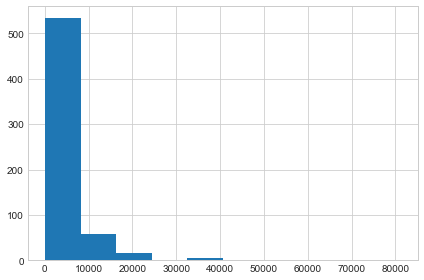

In [23]:
plt.hist(df.ApplicantIncome)


Look at box plots to understand the distributions. 

{'whiskers': [<matplotlib.lines.Line2D at 0x2211b1eba30>,
 'caps': [<matplotlib.lines.Line2D at 0x2211b1fa130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2211b1eb6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2211b1fa7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2211b1fab50>],
 'means': []}

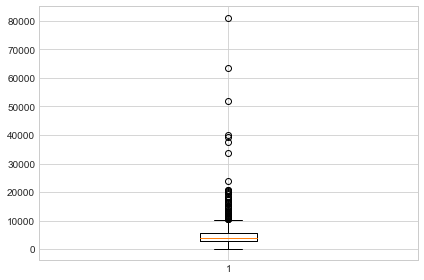

In [24]:
plt.boxplot(df.ApplicantIncome)

Look at the distribution of income segregated  by `Education`

In [25]:
df.groupby('Education').ApplicantIncome.mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

Look at the histogram and boxplot of LoanAmount

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

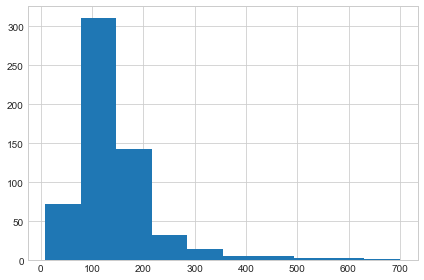

In [26]:
plt.hist(df.LoanAmount)

{'whiskers': [<matplotlib.lines.Line2D at 0x2211b252070>,
 'caps': [<matplotlib.lines.Line2D at 0x2211b252730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2211b244cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2211b252df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2211b260190>],
 'means': []}

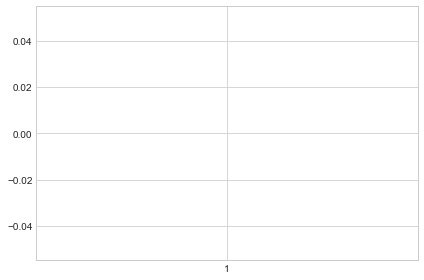

In [27]:
plt.boxplot(df.LoanAmount)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Making a basis model 

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
X = df.copy()
y = X.pop('Loan_Status')
X = X.drop('Loan_ID',axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,stratify=y,random_state=10)

categorical_cols = [cname for cname in X_train.columns if
                        X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
                                        ])

numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                      ('Standardscaler', StandardScaler())
                                      ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [100]:
from sklearn.model_selection import GridSearchCV
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
grid = GridSearchCV(my_pipeline, param_grid=param_grid, cv=5,verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....................................model=SVC(); total time=   0.0s
[CV 2/5] END ....................................model=SVC(); total time=   0.0s
[CV 3/5] END ....................................model=SVC(); total time=   0.0s
[CV 4/5] END ....................................model=SVC(); total time=   0.0s
[CV 5/5] END ....................................model=SVC(); total time=   0.0s
[CV 1/5] END .....................model=LogisticRegression(); total time=   0.0s
[CV 2/5] END .....................model=LogisticRegression(); total time=   0.0s
[CV 3/5] END .....................model=LogisticRegression(); total time=   0.0s
[CV 4/5] END .....................model=LogisticRegression(); total time=   0.0s
[CV 5/5] END .....................model=LogisticRegression(); total time=   0.0s
[CV 1/5] END .............................model=GaussianNB(); total time=   0.0s
[CV 2/5] END .............................model=G

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('Standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                               

In [99]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
model = SVC()
param_grid = {'model': [SVC(), LogisticRegression(),GaussianNB(),KNeighborsClassifier()]    # Which is better, Logistic Regression on a SVM Classifier?
              }

In [36]:
# X_train, X_test, y_train, y_test = preprocessor.fit_transform(X_train, X_test, y_train, y_test)
# dict = {'svc': SVC(), 'logi':LogisticRegression(), 'knn':KNeighborsClassifier(), 'bayes':GaussianNB()}
# fit_and_score(dict, X_train, X_test, y_train, y_test)

TypeError: fit_transform() takes from 2 to 3 positional arguments but 5 were given

In [101]:
grid.score(X_test,y_test)

0.8130081300813008

In [163]:
grid.best_params_

{'model': SVC()}

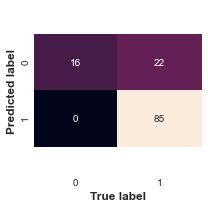

In [33]:
from help_functions import *
from sklearn.metrics import classification_report, accuracy_score

my_pipeline.fit(X_train, y_train)
y_pred = my_pipeline.predict(X_test)
plot_conf_mat(y_test, y_pred)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.42      0.59        38
           Y       0.79      1.00      0.89        85

    accuracy                           0.82       123
   macro avg       0.90      0.71      0.74       123
weighted avg       0.86      0.82      0.79       123



In [166]:
accuracy_score(y_test, y_pred)

0.8211382113821138

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [167]:
import pickle

pickle.dump(my_pipeline, open('model_p','wb'))

In [168]:
loaded_model = pickle.load(open('model_p', 'rb'))

In [169]:
y_pred_pickle = loaded_model.predict(X_test)
accuracy_score(y_test, y_pred_pickle)

0.8211382113821138

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [6]:
# this is to turn the dataframe into json for my local
json_data = X_train.iloc[:100,:].to_json(orient='records')

In [8]:
df = pd.read_json(json_data)

In [9]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,1025,5500,216.0,360.0,NaN,Rural
1,Male,Yes,3+,Graduate,Yes,5677,1424,100.0,360.0,1.0,Rural
2,Male,No,0,Graduate,Yes,7085,0,84.0,360.0,1.0,Semiurban
3,Male,Yes,1,Graduate,Yes,2895,0,95.0,360.0,1.0,Semiurban
4,Male,Yes,2,Not Graduate,No,6125,1625,187.0,480.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,Yes,1,Not Graduate,No,4554,1229,158.0,360.0,1.0,Urban
96,Male,Yes,3+,Graduate,No,5516,11300,495.0,360.0,0.0,Semiurban
97,Male,Yes,0,Graduate,No,11146,0,136.0,360.0,1.0,Urban
98,Male,Yes,1,Graduate,No,6875,0,200.0,360.0,1.0,Semiurban


Combine both incomes as total income and take a log transformation of the same.

In [277]:
type(json_data)

str

In [16]:
# this is for the app.py on my ec2, update the ip address everytime i restart the instance since it might change 
import requests
URL = "http://ec2-18-118-51-178.us-east-2.compute.amazonaws.com:5555/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = data) 

In [17]:
r.json()

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N']

In [10]:
# this is to turn the dataframe into json for my ec2
import json
data = json.loads(X_train.iloc[:100,:].to_json(orient='records'))

## 4. Building a Predictive Model

In [14]:
#this is for the app.py on my local
import requests
URL = 'http://127.0.0.1:5555/scoring'
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [15]:
r.json()

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N']

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [103]:
df.shape

(614, 13)

In [109]:

(df.describe())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python